In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
df=pd.read_csv(r"C:\Users\Lenovo\Desktop\datasets\diabetes.csv")

In [52]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [53]:
df.shape

(768, 9)

<Axes: xlabel='Outcome', ylabel='count'>

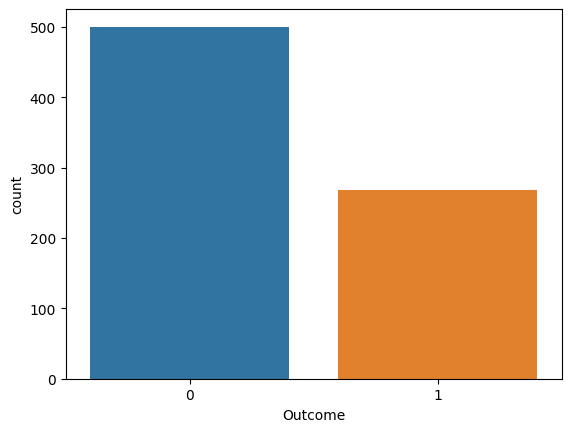

In [54]:
#input data
x=df.drop('Outcome',axis=1)  # we delete the Outcome column from the dataset and store the other input data inside x
#output data
y=df['Outcome']   # now y contains the outcome column
sns.countplot(x=y)

In [55]:
#feature scaling
from sklearn.preprocessing import MinMaxScaler   # we are doing scaling here
scalar=MinMaxScaler()    # we create the object of MinMaxScaler() scaler
x_scaled=scalar.fit_transform(x)   # using fit_transform we scaled the x input data

In [56]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,random_state=0,test_size=0.25)

In [57]:
x_train.shape

(576, 8)

In [58]:
x_test.shape

(192, 8)

In [59]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [60]:
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [61]:

y_pred=knn.predict(x_test)

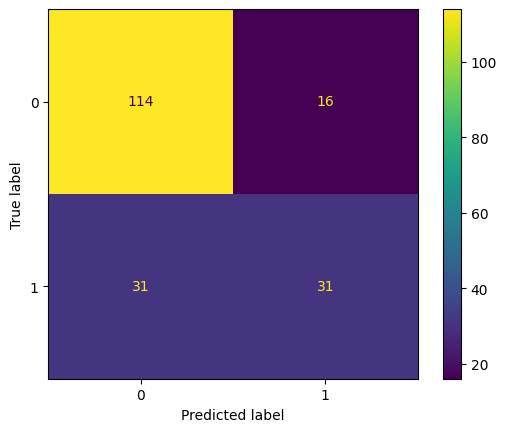

In [63]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [64]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       130
           1       0.66      0.50      0.57        62

    accuracy                           0.76       192
   macro avg       0.72      0.69      0.70       192
weighted avg       0.75      0.76      0.75       192

